## Credit Score Classification

The portfolio is about building an intelligence system to segregate the people into credit score to reduce manual efforts.

In order to build an intelligence system, the classification of credit score is done using machine learning models.

### Step 0 : Importing libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# sets all the figure size to be 15x8 dimension
plt.rcParams['figure.figsize'] = [15, 8] 

# import warnings
# warnings.filterwarnings('ignore')

Yes, congragulations!!! I know installing libraries is sometimes pain..... Let's go to next step

### Step 1 : Importing the data

The dataset `creditscore.csv` is fetched from Kaggle (_yup, the popular dataset place_) 

In [2]:
df = pd.read_csv('creditscoredata.csv')

/tmp/ipykernel_28516/3565240376.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('creditscoredata.csv')


In [3]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Step 2 : Exploratory Data Analysis

In [4]:
df.shape

(100000, 28)

In [5]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
df.isna().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

##### 2.1 Data Cleaning

In [7]:
# object_columns = list(df.select_dtypes(include=['object']).columns)

In [8]:
# object_columns

In [9]:
for i in df.describe(include = object).columns : 
    df[i] = df[i].str.strip('_')
    df[i] = df[i].replace('', np.NaN)
    df[i] = df[i].replace(['nan', '!@9#%8', '#F%$D@*&8', np.NaN])

/tmp/ipykernel_28516/4239975402.py:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df[i] = df[i].replace(['nan', '!@9#%8', '#F%$D@*&8', np.NaN])


In [10]:
df['Age'] = df['Age'].astype(float)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)
# df['Delay_from_due_date'] = df['Delay_from_due_date'].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

The dataframe after cleaning and changing the type of value

In [11]:
df.isna().sum().sort_values(ascending = False)

Monthly_Inhand_Salary       15002
Num_Credit_Inquiries         1965
Credit_Mix                      1
ID                              0
Num_of_Delayed_Payment          0
Monthly_Balance                 0
Payment_Behaviour               0
Amount_invested_monthly         0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_History_Age              0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Delay_from_due_date             0
Customer_ID                     0
Type_of_Loan                    0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Name                            0
Month                           0
Credit_Score                    0
dtype: int64

In [12]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

##### 2.2 Visual representation of missing data and summary of features

<Axes: >

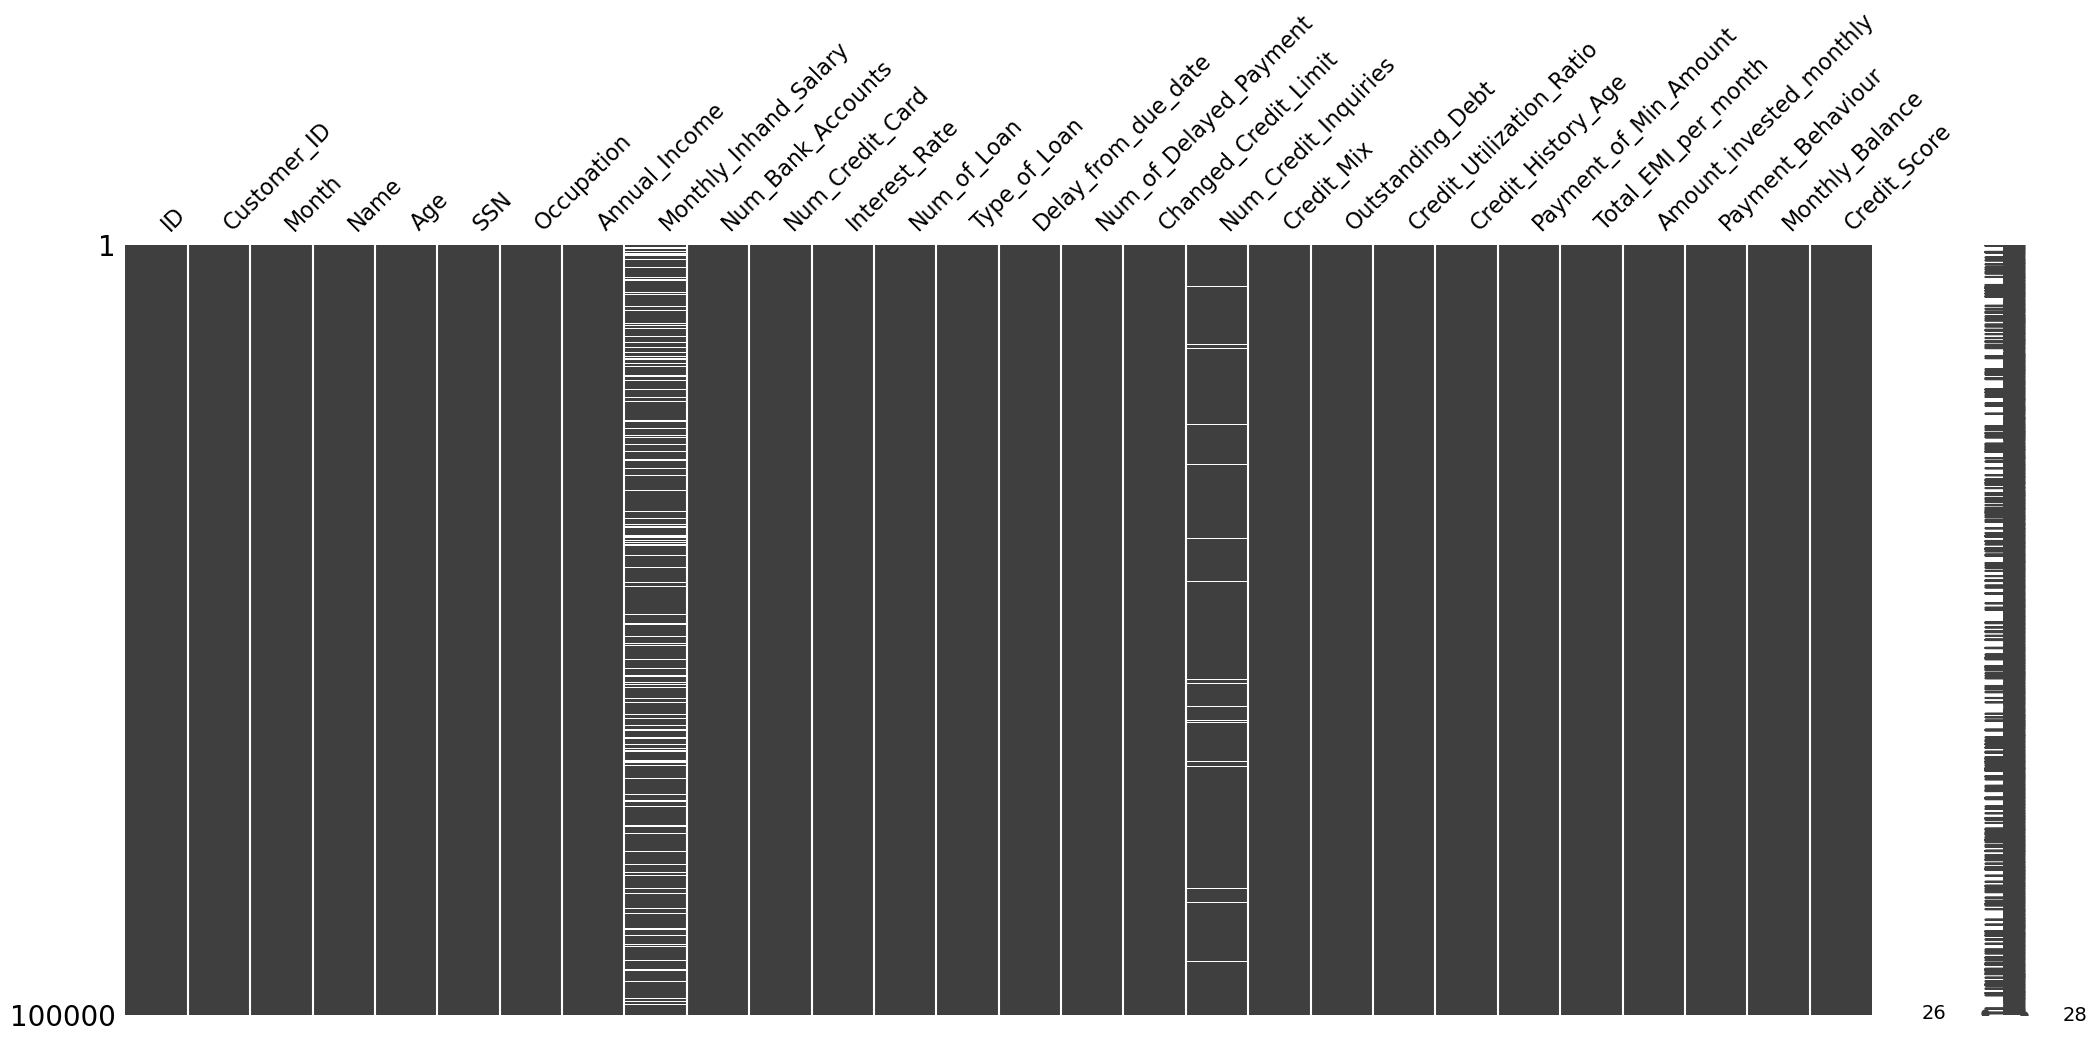

In [13]:
msno.matrix(df)

## If msno throws an error saying "Cannot find gridb",...
## Please get into missigno package, correct the grid(b=False) to grid(visible=False)

By observing, we can confirm that the missing values are scattered in data rather than clustered at the same place

In [14]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.768580,10.389784,27.754251,1426.220376,32.285173,1403.118217,636.932570,-3.000000e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,225.403321,6.790119,193.177339,1155.129026,5.116875,8306.041270,2041.827136,3.162151e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.052567,30.306660,74.616863,2.667327e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.959898,3.340313e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,1945.962500,36.496663,161.224249,266.118215,4.672590e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


By seeing the min, max value and comparing it to the mean value, we can see the outliers present in the data and will  be taken care in feature extraction process

In [18]:
df.describe(include = object)

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,99999,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6260,3,404,3,6,3
top,0x1602,CUS_0xd40,January,Jessicad,394-01-9302,Lawyer,Not Specified,Standard,19 Years and 5 Months,Yes,Low_spent_Small_value_payments,Standard
freq,1,8,12500,49,11,7097,1568,45820,498,52326,27593,53174


From the above statsitics, we confirm that every record in customer's ID is unique. Also, each customer's data have eight different months. These are subcategorised in columns like occupation, type of loan, payment behaviour, credit mix.

In type of loan feature, most frequently occuring value is 'Not Specified'

##### 2.3 Feature Analysis

_2.3.1 Categorical variable - Occupation_

In [19]:
occupation_num = df['Occupation'].value_counts(dropna = False)
occupation_num

Occupation
Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: count, dtype: int64

The lawyer has the most of the customer's occupation from the above data

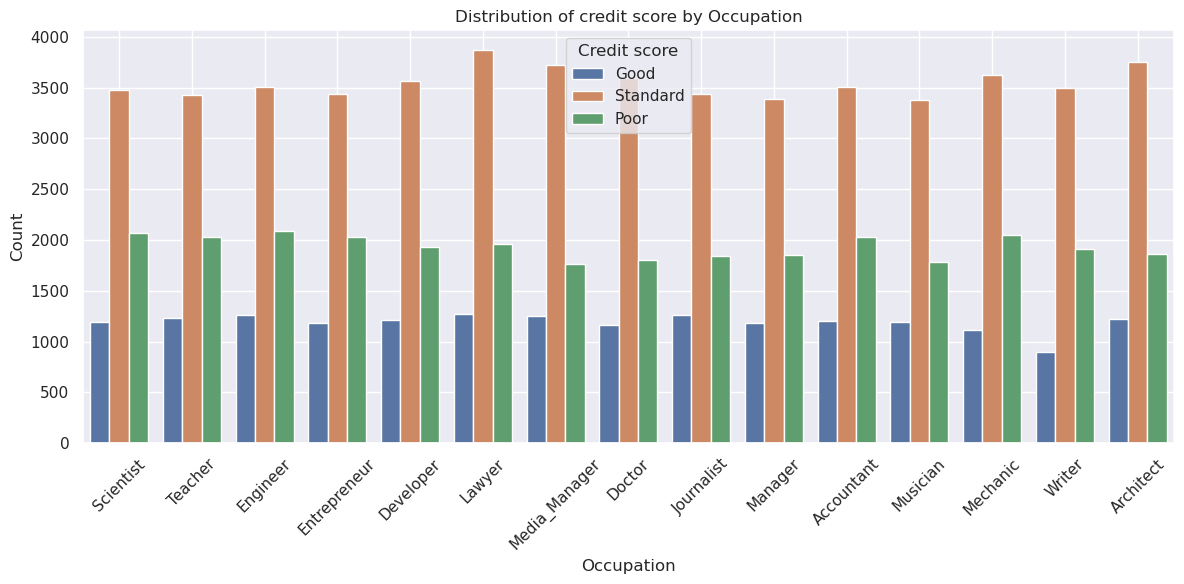

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of credit score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit score')
plt.grid(True)
plt.tight_layout()
plt.show()